## NeXLParticle

This example shows how to use NeXLParticle and the 'Zeppelin' struct to load Zeppelin particle data sets and access the tabular, image and spectral data.

In [1]:
using Revise
using NeXLParticle
using NeXLSpectrum
using Gadfly
using DataFrames
using Images

┌ Info: Precompiling NeXLParticle [9f92fee6-ed62-42c3-b009-0e4f934456c2]
└ @ Base loading.jl:1273
┌ Info: Loading NeXLSpectrum Gadfly support
└ @ NeXLSpectrum C:\Users\nicho\.julia\dev\NeXLSpectrum\src\gadflysupport.jl:338


In [2]:
zep=Zeppelin("Zepellin\\test.hdz")

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = catvaluetype at array.jl:614 [inlined]
└ @ Core C:\Users\nicho\.julia\packages\CategoricalArrays\xjesC\src\array.jl:614
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = catvaluetype at array.jl:614 [inlined]
└ @ Core C:\Users\nicho\.julia\packages\CategoricalArrays\xjesC\src\array.jl:614


Zeppelin[Zepellin\test.hdz,(250, 66)]

In [27]:
ENV["columns"]=240
zep.data[1:10, [:NUMBER, :DAVG, :CLASSNAME, :FIRSTELM, :FIRSTPCT, :SECONDELM, :SECONDPCT, :THIRDELM, :THIRDPCT, :FOURTHELM, :FOURTHPCT ]]

,NUMBER,DAVG,CLASSNAME,FIRSTELM,FIRSTPCT,SECONDELM,SECONDPCT,THIRDELM,THIRDPCT,FOURTHELM,FOURTHPCT
,Int64,Float64,Categorical…,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64
1,1,1.83843,Iron-90,26,90.2188,16,5.06622,14,2.26288,27,0.982895
2,2,2.98486,Iron-60,26,60.1755,16,26.9297,15,8.91383,22,3.98096
3,3,3.26079,Iron-90,26,95.6989,16,3.37064,17,0.480769,22,0.44965
4,4,3.50613,Calcite,20,89.9441,14,5.39218,19,1.37551,16,1.21557
5,5,2.39501,Iron-90,26,96.8931,16,1.70033,14,1.40655,0,0.0
6,6,3.59721,Iron-90,26,94.2326,14,3.21053,16,1.34057,13,0.527743
7,7,2.73491,Iron-60,26,65.0324,56,12.629,16,7.0487,14,6.72538
8,8,1.20893,Iron-80,26,83.333,16,5.95446,30,3.88231,14,2.1855
9,9,2.75471,Ba+S,56,39.1567,16,28.5419,26,20.709,20,5.99301


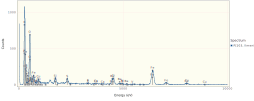

In [45]:
set_default_plot_size(10inch,4inch)
s=zep[103]
imgs = s[:Image]
plot(s,xmax=1.0e4, autoklms=true)

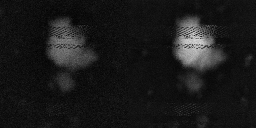

In [5]:
[imgs[:,:,1] imgs[:,:,2]]

In [6]:
s[:StagePosition]

Dict{Symbol,Float64} with 5 entries:
  :Z => 2.50081
  :T => -0.0
  :R => -0.0
  :X => -1.39743
  :Y => 0.81832

In [7]:
elms = ( n"Ag", n"Al", n"Ba", n"Bi", n"Br", n"C", n"Ca", n"Ce", n"Cl", n"Co", n"Cr", n"Cu", n"F", n"Fe", n"K", n"Mg", n"Mn", n"Na", n"Nd", n"Ni", 
    n"O", n"P", n"Pb", n"S", n"Sb", n"Si", n"Sn", n"Sr", n"Ti", n"V", n"W", n"Zn", n"Zr" )
refs = Dict{Element,Spectrum}( elm => readEMSA("Zepellin\\Standards\\$(elm.symbol) std.msa") for elm in elms);

In [8]:
det = matching(refs[n"Fe"],132.0)

EDS[4096 channels, E[ch] = 1.63032 + 9.99856⋅ch, 132.0 eV @ Mn Kα]

In [42]:
@time res2=NeXLParticle.quantify(zep, det, refs);

┌ Info: k[Nd in NdF2, Nd L3-M5 + 2 others] = 0.7407344705916089
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[P in GaP, P K-L3 + 3 others] = 0.18048651050598127
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Sr in SrF2, Sr K-L3 + 1 other] = 0.6190759306572752
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Ca in CaF2, Ca K-L3 + 3 others] = 0.49742458129383227
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Br in KBr, Br K-L3 + 1 other] = 0.6219668521669985
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Pb in K227, Pb L3-M5 + 1 other] = 0.6325302958721861
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[K in KBr, K K-L3 + 3 others] = 0.28555165914863107
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Ba in BaF2, Ba L3-M5 +

 63.165434 seconds (651.42 M allocations: 17.740 GiB, 2.00% gc time)


┌ Info: k[F in CaF2, F K-L3 + 1 other] = 0.09710204130798027
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19


In [46]:
res2[102:112,17:end]

,CO,NI,CU,ZN,BR,SR,ZR,AG,SN,SB,BA,CE,ND,W,PB,BI
,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…
1,0 ± 5.4,0 ± 5.82,0.881 ± 0.108,0.597 ± 0.117,0 ± 8.63,4.78 ± 1.02,0 ± 7.32,0 ± 0.112,1.3 ± 0.151,0.891 ± 0.123,0 ± 7.05,0 ± 6.77,0 ± 7.01,0 ± 0.245,1.62 ± 0.397,0 ± 12.9
2,0 ± 0.11,0 ± 5.67,9.77 ± 0.167,1.38 ± 0.136,0 ± 8.39,0 ± 14,0.757 ± 0.117,0 ± 0.107,0 ± 7.02,0.884 ± 0.127,8.81 ± 0.233,0 ± 7.54,0 ± 0.186,1.16 ± 0.268,0 ± 9.24,0 ± 12.6
3,0 ± 6.98,0.905 ± 0.104,2.03 ± 0.128,0 ± 0.13,3.76 ± 0.42,0 ± 20.1,0.941 ± 0.211,1.26 ± 0.164,1.15 ± 0.26,0 ± 0.183,0 ± 10.1,0 ± 9.3,0 ± 8.87,0 ± 12,0 ± 12.7,0 ± 17.6
4,0.925 ± 0.107,0.389 ± 0.115,4.85 ± 0.156,2.96 ± 0.154,0 ± 9.92,0 ± 15.8,7.74 ± 0.219,0 ± 0.126,6.44 ± 0.209,0 ± 7.64,12.4 ± 0.269,0.661 ± 0.189,0 ± 7.81,1.04 ± 0.281,2.66 ± 0.497,0 ± 0.555
5,0 ± 5.11,0 ± 4.55,0.708 ± 0.0814,0.278 ± 0.0818,1.11 ± 0.269,0 ± 11,0 ± 0.152,0.399 ± 0.0905,0 ± 0.0951,0 ± 4.59,0 ± 5.47,0 ± 5.29,0.603 ± 0.134,0 ± 6.87,3.52 ± 0.359,3.74 ± 0.394
6,0 ± 6.61,0.396 ± 0.0977,6.53 ± 0.156,0 ± 8.01,2.81 ± 0.5,15.2 ± 1.37,8.34 ± 0.272,0 ± 0.139,0 ± 0.211,1.8 ± 0.164,19.8 ± 0.345,0.696 ± 0.232,0 ± 9.69,0 ± 11.3,0 ± 11.8,0 ± 0.596
7,0 ± 0.118,0 ± 7.08,8.25 ± 0.186,0.8 ± 0.145,1.48 ± 0.451,0 ± 1.3,1.31 ± 0.181,0.628 ± 0.139,0 ± 0.213,6.16 ± 0.202,14.4 ± 0.342,0 ± 9.6,0 ± 9.28,0.965 ± 0.289,0 ± 11.2,0 ± 15.6
8,1.02 ± 0.126,0 ± 6.99,2.11 ± 0.139,0 ± 7.7,0 ± 10.6,4.57 ± 1.2,0 ± 10.2,0 ± 0.142,1.38 ± 0.18,0.957 ± 0.139,3.82 ± 0.204,1.03 ± 0.188,1.08 ± 0.215,0 ± 0.253,5.16 ± 0.501,5.29 ± 0.572
9,1.6 ± 0.161,0 ± 8.93,1.38 ± 0.138,0 ± 10.1,0 ± 0.471,0 ± 23,0 ± 12.8,0 ± 9.26,1.26 ± 0.218,0 ± 9.79,11 ± 0.267,0 ± 11.6,0.992 ± 0.27,0 ± 13.8,0 ± 14.8,4.5 ± 0.681


Things to add
  - Plot multiple rows from a zep
  - Add image scales
  - Add multi-images to left of plot
  - Row filters
  - Columns sorting
  - Optimize signature

In [11]:
using TimerOutputs

function quantify2(
    zep::Zeppelin,
    det::Detector,
    refs::Dict{Element,Spectrum},
    rows::Union{Vector{Int},UnitRange{Int}}=1:1000000;
    strip::Vector{Element} = [n"C"], # Element to not include in table
    special::Vector{Element} = [n"O"], # Element for special treatment in signature
    cullRule::NeXLParticle.CullingRule = NeXLParticle.NSigmaCulling(3.0),
)
    rows = ismissing(rows) ? eachparticle(zep) : rows
    # Build the filtered references
    filt = buildfilter(NeXLSpectrum.GaussianFilter, det)
    filtrefs = FilteredReference[]
    e0, toa = NaN64, NaN64
    for elm in keys(refs)
        lines = ktransitions
        if elm > n"Ca"
            lines = union(ktransitions, ltransitions)
        elseif elm > n"Ba"
            lines = union(ltransitions, mtransitions)
        end
        cfs = NeXLSpectrum.charFeature(elm, Tuple(lines), maxE = 0.9 * refs[elm][:BeamEnergy])
        fr = filter(refs[elm], det, cfs, filt, 1.0 / dose(refs[elm]))
        append!(filtrefs, fr)
        e0, toa = refs[elm][:BeamEnergy], refs[elm][:TakeOffAngle]
    end
    # Create a list of columns (by element)
    newcols = sort(collect(filter(elm -> !(elm in strip), keys(refs))))
    quant = zeros(UncertainValue, size(zep.data, 1), length(newcols))
    to = TimerOutput()
    # quantify and tabulate each particle
    for row in intersect(eachparticle(zep),rows)
        @timeit to "unk = spec" unk = spectrum(zep, row, false)
        if !ismissing(unk)
            # Particle spectra are often missing critical data items...
            unk[:ProbeCurrent], unk[:LiveTime] = get(unk, :ProbeCurrent, 1.0), get(unk, :LiveTime, 1.0)
            unk[:BeamEnergy], unk[:TakeOffAngle] = get(unk, :BeamEnergy, e0), get(unk, :TakeOffAngle, toa)
            @timeit to "fit(..)" res = fit(FilteredUnknownW, unk, filt, filtrefs, true)
            @timeit to "cull" culled = map(kr -> NeXLParticle.cull(cullRule, kr), NeXLParticle.askratios(res))
            @timeit to "filter" krv = filter(kr -> !(kr.element in strip), culled)
            @timeit to "sig" sig = NeXLParticle.signature(krv, special)
            @timeit to  "quant[]" quant[row, :] =  [ 100.0 * sig[elm] for elm in newcols ]
        else
            quant[row, :] = [ missing for _ in eachindex(newcols) ]
        end
    end
    @timeit to "quantRes" quantRes = DataFrame((convert(Symbol, elm) => quant[:, i] for (i, elm) in enumerate(newcols))...)
    show(to)
    # First, strip out all old elemental data items
    if false
        removeme = map(elm -> convert(Symbol, elm), zep.elms)
        append!(removeme, COMPOSITIONAL_COLUMNS)
        append!(removeme, CLASS_COLUMNS)
        remaining = copy(zep.data[:, filter(f -> !(f in removeme), names(zep.data))])
        return hcat(remaining, quantRes)
    else
        return quantRes
    end
end

quantify2 (generic function with 2 methods)

In [29]:
res2=quantify2(zep, det, refs);

┌ Info: k[Sr in SrF2, Sr K-L3 + 1 other] = 0.6190759306572752
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Ce in CeO2, Ce L3-M5 + 17 others] = 0.7547984405661815
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Pb in K227, Pb L3-M5 + 1 other] = 0.6325302958721861
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Ca in CaF2, Ca K-L3 + 3 others] = 0.49742458129383227
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Nd in NdF2, Nd L3-M5 + 2 others] = 0.7407344705916089
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Ba in BaF2, Ba L3-M5 + 17 others] = 0.7311425030776585
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Br in KBr, Br K-L3 + 1 other] = 0.6219668521669985
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Cl in NaCl, Cl

 ─────────────────────────────────────────────────────────────────────
                              Time                   Allocations      
                      ──────────────────────   ───────────────────────
   Tot / % measured:       62.1s / 100%            17.3GiB / 100%     

 Section      ncalls     time   %tot     avg     alloc   %tot      avg
 ─────────────────────────────────────────────────────────────────────
 sig             250    51.1s  82.3%   204ms   12.7GiB  73.4%  52.0MiB
 fit(..)         250    10.5s  16.9%  42.0ms   4.49GiB  26.0%  18.4MiB
 unk = spec      250    439ms  0.71%  1.75ms    101MiB  0.57%   412KiB
 cull            250   52.8ms  0.08%   211μs   5.88MiB  0.03%  24.1KiB
 quant[]         250   1.79ms  0.00%  7.14μs    668KiB  0.00%  2.67KiB
 filter          250    192μs  0.00%   766ns    184KiB  0.00%     752B
 quantRes          1    135μs  0.00%   135μs    279KiB  0.00%   279KiB
 ─────────────────────────────────────────────────────────────────────

┌ Info: k[O in MgO, O K-L3 + 1 other] = 0.20090026445849185
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19


In [33]:
res2[102:112,1:17]

,O,F,NA,MG,AL,SI,P,S,CL,K,CA,TI,V,CR,MN,FE
,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…,Uncertai…
1,32 ± 0.131,0 ± 2.74,2.89 ± 0.0472,0.558 ± 0.00807,1.79 ± 0.0109,5.19 ± 0.017,0 ± 1.32,0.364 ± 0.0132,0.0729 ± 0.00897,0.246 ± 0.0238,0.258 ± 0.0146,0 ± 6.24,9.56 ± 0.568,0 ± 6.3,0 ± 1.89,1.88 ± 0.0161
2,22.4 ± 0.114,0 ± 2.76,0 ± 0.964,0 ± 0.369,0.141 ± 0.0195,0.373 ± 0.00647,0 ± 1.12,0.992 ± 0.0144,0 ± 0.538,0.499 ± 0.0185,0.223 ± 0.013,0 ± 5.25,6.55 ± 0.456,0 ± 5.14,0 ± 2.07,6.13 ± 0.0248
3,41.4 ± 0.198,0 ± 5.07,0.393 ± 0.0544,0.386 ± 0.0119,4.54 ± 0.0231,6.52 ± 0.028,0 ± 2.62,0.599 ± 0.0276,0.116 ± 0.0176,4.98 ± 0.0753,0.624 ± 0.0331,0 ± 11.5,18.6 ± 1.02,0 ± 11.3,0 ± 3.41,1.63 ± 0.0249
4,48.9 ± 0.237,0 ± 8.22,0.391 ± 0.0933,0.183 ± 0.0136,0.288 ± 0.0128,0.661 ± 0.0165,0 ± 3.84,6.76 ± 0.0634,0 ± 1.63,0.606 ± 0.0776,0.868 ± 0.0457,0 ± 16.2,11.2 ± 1.43,0 ± 15.9,0 ± 5.96,11.6 ± 0.0618
5,15.3 ± 0.0753,0 ± 1.74,0 ± 0.508,0 ± 0.209,0 ± 0.426,0.0319 ± 0.00273,0.106 ± 0.0194,0.118 ± 0.00698,0 ± 0.00466,0 ± 0.0119,0 ± 0.362,0 ± 2.95,4.57 ± 0.271,0 ± 2.94,0 ± 1.35,6.88 ± 0.0192
6,18.9 ± 0.1,0 ± 2.25,0.171 ± 0.0245,0.0737 ± 0.00413,0 ± 0.713,0.233 ± 0.00579,0 ± 1.15,1.57 ± 0.0174,0.0365 ± 0.00749,0.564 ± 0.0227,0.0591 ± 0.0122,0 ± 4.73,3.25 ± 0.391,0 ± 4.58,0 ± 1.49,1.4 ± 0.0124
7,28 ± 0.151,0 ± 3.85,0 ± 1.46,0.025 ± 0.00616,0.187 ± 0.0284,0.486 ± 0.00963,0 ± 0.0514,2.81 ± 0.0267,0.0658 ± 0.0127,0.44 ± 0.0365,1.07 ± 0.0262,0 ± 7.74,9.2 ± 0.656,0 ± 7.54,0 ± 2.77,4.71 ± 0.0278
8,45.8 ± 0.243,0 ± 0.498,0.56 ± 0.0774,0.0934 ± 0.0126,0.11 ± 0.0129,0.44 ± 0.015,0 ± 3.47,6.16 ± 0.0555,0 ± 0.0251,0.952 ± 0.0683,0.589 ± 0.0388,0 ± 16.5,15.4 ± 1.41,0 ± 16,0 ± 6.43,15.7 ± 0.0726
9,36.9 ± 0.218,0 ± 7.33,0 ± 2.46,0.0485 ± 0.0105,0.144 ± 0.0107,0.741 ± 0.0164,0 ± 2.5,2.23 ± 0.0356,0 ± 0.0211,0.234 ± 0.0553,0.654 ± 0.0326,0 ± 13.6,12.9 ± 1.09,0 ± 13.2,0 ± 5.32,11.9 ± 0.0589
